<h1><center>Data processing</center></h1>

## Import libraries

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [8]:
path = 'C:/Users/AymenBouhou/Desktop/Stage/scraper-main/src/2023.csv'

chunk_size = 1000
df = pd.DataFrame()
for chunk in pd.read_csv(path, chunksize=chunk_size):
    df = pd.concat([df, chunk])

pd.set_option('display.max_columns', None)

## Exploring the data

In [105]:
df.head()

,short_name,age,height,nationality,club_name,player_positions,potential,weight_kg,foot,best_overall_x,best_position,growth,joined,value,wage,release_clause,total_attacking,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,total_skill,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,total_movement,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,total_power,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,total_mentality,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,total_defending,defending_marking,defending_standing_tackle,defending_sliding_tackle,total_goalkeeping,gk_diving,gk_handling,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,international_reputation,pace_/_diving,shooting_/_handling,passing_/_kicking,dribbling_/_reflexes,defending_/_pace,physical_/_positioning,league_true,days_since,best_overall_y,BMI
0,K. Mbappé,23,182.0,France,Paris Saint Germain,ST,95,75.0,Right,92,ST,4,"Jul 1, 2018",190500000.0,230000.0,366700000.0,411,78,93,72,85,83,404,93,80,69,71,91,461,97,97,93,93,81,410,88,77,87,76,82,361,64,38,92,83,84,88,92,26,34,32,42,13,5,11,6,2181,470,4,5,High,Low,4,97,89,80,92,36,76,French Ligue 1,1752,79.423077,22.642193
1,K. De Bruyne,31,181.0,Belgium,Manchester City,CM,91,75.0,Right,91,CM,0,"Aug 30, 2015",107500000.0,350000.0,198900000.0,410,94,85,55,93,83,441,86,89,83,93,90,393,75,73,76,91,78,409,92,63,89,74,91,405,75,65,88,94,83,88,185,66,66,53,56,15,13,10,13,2299,481,5,4,High,Medium,4,74,88,93,86,63,77,English Premier League,2788,79.384615,22.893074
2,R. Lewandowski,33,185.0,Poland,FC Barcelona,ST,91,81.0,Right,91,ST,0,"Jul 18, 2022",84000000.0,420000.0,172200000.0,429,71,94,91,84,89,408,85,79,85,70,89,403,76,75,77,93,82,423,91,85,76,87,84,395,81,49,94,81,90,88,96,35,42,19,51,15,6,8,10,2205,458,4,4,High,Medium,5,75,91,79,86,44,83,Spanish La Liga,274,76.606061,23.666910
3,K. Benzema,34,185.0,France,Real Madrid,CF,91,81.0,Right,91,CF,0,"Jul 9, 2009",64000000.0,450000.0,131200000.0,433,75,91,90,89,88,409,87,82,73,76,91,398,78,79,77,92,72,411,87,79,82,82,81,366,63,39,92,90,82,90,85,43,24,18,41,13,11,5,7,2143,454,4,4,Medium,Medium,4,79,88,83,87,39,78,Spanish La Liga,5031,77.818182,23.666910
4,L. Messi,35,169.0,Argentina,Paris Saint Germain,CAM,91,67.0,Left,92,CAM,0,"Aug 10, 2021",54000000.0,195000.0,99900000.0,423,84,90,70,91,88,464,95,93,93,90,93,441,87,76,91,92,95,383,86,68,70,68,91,346,44,40,93,94,75,96,79,20,35,24,54,6,11,14,8,2190,452,4,4,Low,Low,5,81,89,90,94,34,64,French Ligue 1,616,79.423077,23.458562


In [35]:
df.shape

(18440, 73)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18440 entries, 0 to 18439
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   sofifa_id                   18440 non-null  int64 
 1   player_url                  18440 non-null  object
 2   short_name                  18440 non-null  object
 3   age                         18440 non-null  int64 
 4   height                      18440 non-null  object
 5   nationality                 18440 non-null  object
 6   club_name                   18440 non-null  object
 7   league_name                 18440 non-null  object
 8   player_positions            18440 non-null  object
 9   potential                   18440 non-null  int64 
 10  weight_kg                   18440 non-null  object
 11  foot                        18440 non-null  object
 12  best_overall                18440 non-null  int64 
 13  best_position               18440 non-null  ob

In [132]:
df.describe()

,age,height,potential,weight_kg,best_overall_x,growth,value,wage,release_clause,total_attacking,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,total_skill,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,total_movement,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,total_power,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,total_mentality,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,total_defending,defending_marking,defending_standing_tackle,defending_sliding_tackle,total_goalkeeping,gk_diving,gk_handling,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skill_moves,international_reputation,pace_/_diving,shooting_/_handling,passing_/_kicking,dribbling_/_reflexes,defending_/_pace,physical_/_positioning,days_since,best_overall_y,BMI
count,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,1.828300e+04,18283.000000,1.828300e+04,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.00000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.00000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000
mean,24.943445,181.676475,70.813871,75.166384,66.777990,5.040201,2.841148e+06,8744.456599,4.889564e+06,249.232128,49.467702,46.237652,51.923098,58.992014,42.611661,258.817700,55.846962,47.859268,43.01083,53.606356,58.494284,318.583493,64.666904,64.838812,63.479079,61.590385,64.008314,297.267462,57.803916,64.683914,62.885631,65.126183,46.767817,255.476235,55.872997,46.957611,50.457857,54.230433,47.957337,58.11508,141.494722,46.701417,48.458677,46.334628,81.459881,16.400864,16.214899,16.232183,16.509435,1602.331620,357.860471,2.949516,2.385057,1.084833,68.007439,53.763441,58.001313,63.065744,50.265055,64.757480,787.631461,66.777990,22.748286
std,4.777144,6.827862,6.283713,7.009830,6.662787,5.397215,7.471941e+06,19154.227680,1.422059e+07,74.637687,17.825166,19.643344,17.339998,14.316436,17.652827,78.239984,18.743301,17.964613,17.01356,14.620907,16.624231,57.562926,15.249282,15.023881,14.891319,8.930285,14.535451,51.523614,12.953828,12.193523,16.186032,12.581149,19.361453,65.526971,16.814306,20.618266,19.713446,13.495680,15.767744,12.08964,61.178289,20.367718,21.090407,20.627473,85.295953,17.605337,16.957366,17.114088,17.915690,274.222067,39.705776,0.681800,0.775373,0.354185,10.503809,13.644898,9.746177,9.367215,16.357612,9.527644,757.192652,4.475512,1.374611
min,16.000000,155.000000,48.000000,49.000000,46.000000,0.000000,0.000000e+00,500.000000,0.000000e+00,43.000000,5.000000,3.000000,5.000000,10.000000,3.000000,43.000000,4.000000,5.000000,5.00000,9.000000,5.000000,115.000000,12.000000,15.000000,17.000000,30.000000,19.000000,135.000000,18.000000,23.000000,11.000000,25.000000,4.000000,56.000000,10.000000,3.000000,2.000000,10.000000,6.000000,13.00000,22.000000,3.000000,6.000000,6.000000,12.000000,2.000000,2.000000,2.000000,2.000000,745.000000,237.000000,1.000000,1.000000,1.000000,28.000000,18.000000,25.000000,28.000000,14.000000,30.000000,20.000000,54.107143,16.568047
25%,21.000000,177.000000,66.000000,70.000000,63.000000,0.000000,5.000000e+05,1000.000000,6.100000e+05,224.000000,39.000000,31.000000,44.000000,54.000000,30.000000,227.000000,50.000000,36.000000,32.00000,45.000000,55.000000,291.000000,57.000000,58.000000,55.000000,56.000000,5

In [38]:
# Drop duplicates

df=df.drop_duplicates(subset=['sofifa_id'], keep='first')

In [39]:
df.set_index('sofifa_id', inplace=True)

In [40]:
# Check for missing values

df.isnull().values.any()

True

<Axes: >

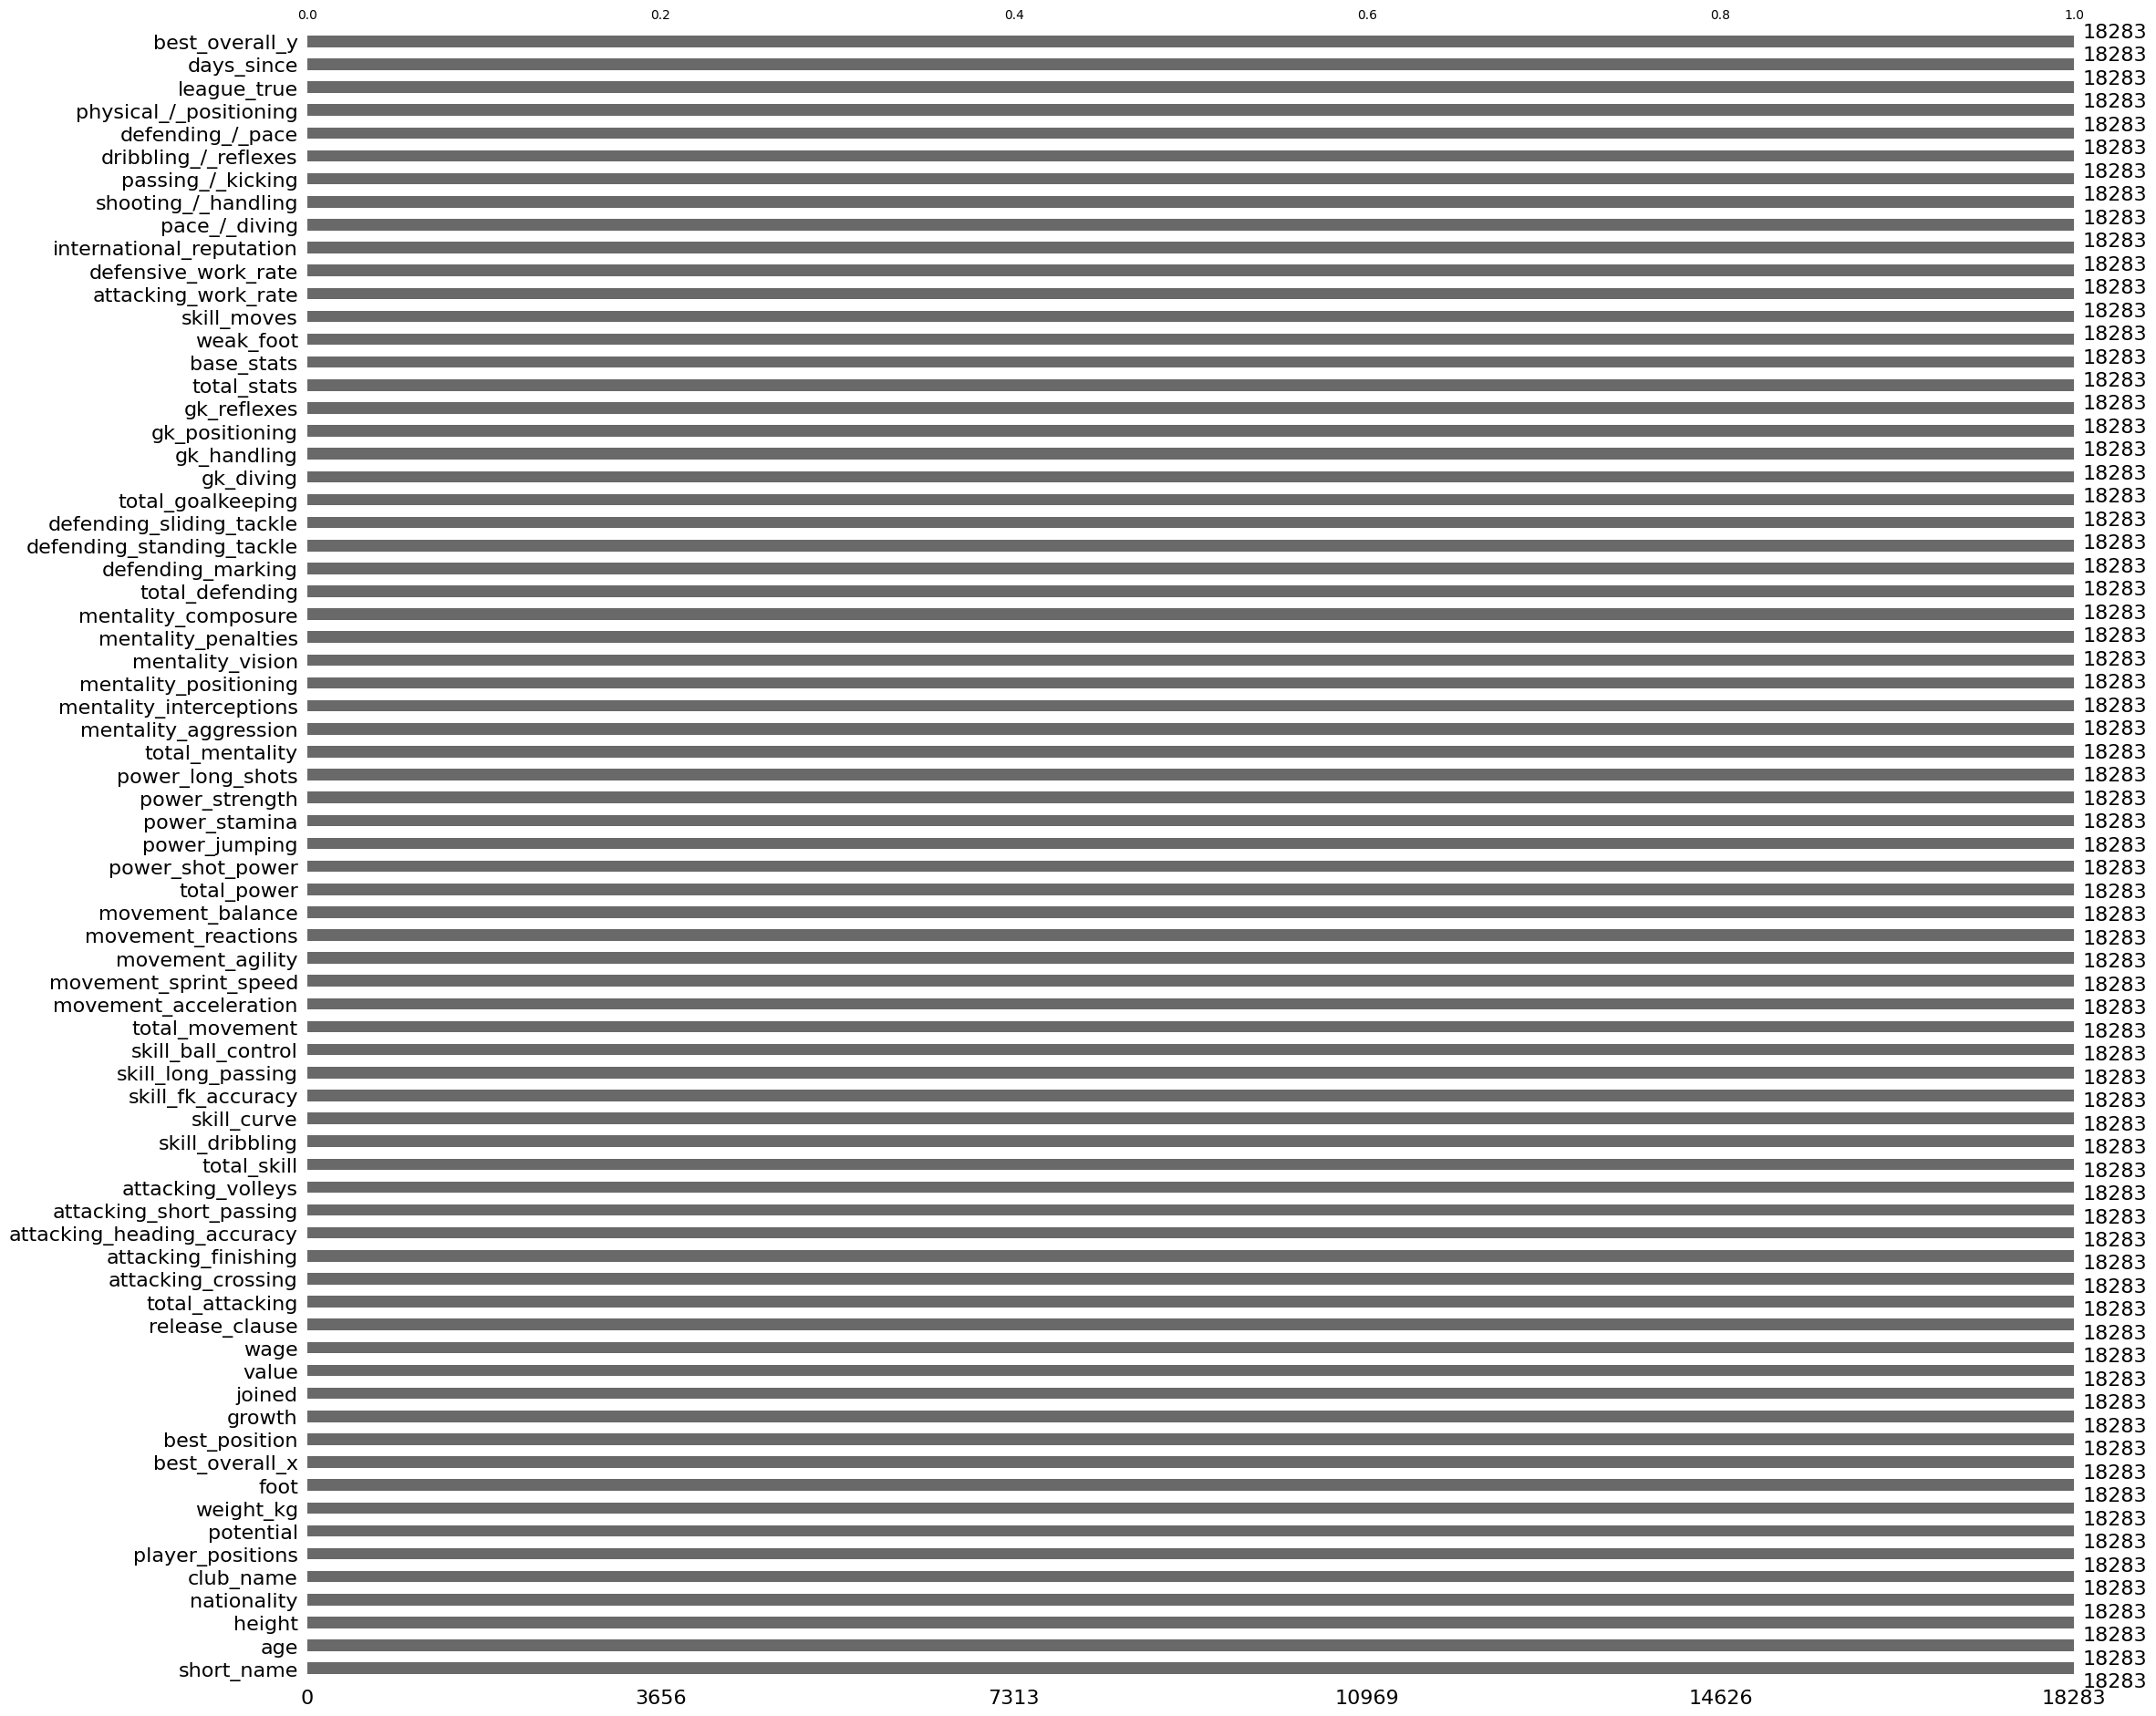

In [88]:
msno.bar(df)

## Data cleaning

#### Drop unnecessary columns

In [42]:
df.drop(["player_url", "loan_date_end"], axis = 1, inplace = True)

#### Function to correct money format

In [43]:
def convert_currency(value):
    
    if 'M' in value:
        amend_value = value.replace('€', '').replace('M','')
        amend_value = float(amend_value) * 1000000
        
    elif 'K' in value:
        amend_value = value.replace('€', '').replace('K','')
        amend_value = float(amend_value) * 1000
        
    else:
        amend_value = value.replace('€', '')
        amend_value = float(amend_value)
        
    return amend_value

In [44]:
# Before
df_sample=df[['short_name','value','wage','release_clause']].head(20)
df_sample.head()

,short_name,value,wage,release_clause
sofifa_id,,,,
231747,K. Mbappé,€190.5M,€230K,€366.7M
192985,K. De Bruyne,€107.5M,€350K,€198.9M
188545,R. Lewandowski,€84M,€420K,€172.2M
165153,K. Benzema,€64M,€450K,€131.2M
158023,L. Messi,€54M,€195K,€99.9M


In [45]:
# After

df_sample['value'] = df_sample['value'].apply(convert_currency)
df_sample['wage'] = df_sample['wage'].apply(convert_currency)
df_sample['release_clause'] = df_sample['release_clause'].apply(convert_currency)

df_sample.head()


,short_name,value,wage,release_clause
sofifa_id,,,,
231747,K. Mbappé,190500000.0,230000.0,366700000.0
192985,K. De Bruyne,107500000.0,350000.0,198900000.0
188545,R. Lewandowski,84000000.0,420000.0,172200000.0
165153,K. Benzema,64000000.0,450000.0,131200000.0
158023,L. Messi,54000000.0,195000.0,99900000.0


In [75]:
df['value'] = df['value'].apply(convert_currency)
df['wage'] = df['wage'].apply(convert_currency)
df['release_clause'] = df['release_clause'].apply(convert_currency)

#### Correct weight

In [46]:
# Before:
df_sample = df[['short_name','weight_kg']].head(20)
df_sample.head()


,short_name,weight_kg
sofifa_id,,
231747,K. Mbappé,75kg / 165lbs
192985,K. De Bruyne,75kg / 165lbs
188545,R. Lewandowski,81kg / 179lbs
165153,K. Benzema,81kg / 179lbs
158023,L. Messi,67kg / 148lbs


In [47]:
df_sample['weight_kg'] = df_sample['weight_kg'].str.split('kg').str[0].astype(float)
df_sample.head()

,short_name,weight_kg
sofifa_id,,
231747,K. Mbappé,75.0
192985,K. De Bruyne,75.0
188545,R. Lewandowski,81.0
165153,K. Benzema,81.0
158023,L. Messi,67.0


In [ ]:
df['weight_kg'] = df['weight_kg'].str.split('kg').str[0].astype(float)

#### Correct height

In [48]:
df_sample = df[['short_name','height']].head(20)
df_sample.head()

,short_name,height
sofifa_id,,
231747,K. Mbappé,"182cm / 6'0"""
192985,K. De Bruyne,"181cm / 5'11"""
188545,R. Lewandowski,"185cm / 6'1"""
165153,K. Benzema,"185cm / 6'1"""
158023,L. Messi,"169cm / 5'7"""


In [49]:
df_sample['height'] = df_sample['height'].str.split('cm').str[0].astype(float)
df_sample.head()

,short_name,height
sofifa_id,,
231747,K. Mbappé,182.0
192985,K. De Bruyne,181.0
188545,R. Lewandowski,185.0
165153,K. Benzema,185.0
158023,L. Messi,169.0


In [79]:
df['height'] = df['height'].str.split('cm').str[0].astype(float)

#### Creat Body Mass Index

In [103]:
df['BMI'] = df['weight_kg'] / ((df['height'] / 100) ** 2)

#### Correct league names

In [50]:
leagues = pd.read_csv('league_names.csv')
leagues = leagues.rename(columns={'league': 'league_name'})

In [51]:
# Before
df_sample = df[['short_name','club_name','league_name']].head(20)
df_sample.head()

,short_name,club_name,league_name
sofifa_id,,,
231747,K. Mbappé,Paris Saint Germain,[France] Lig
192985,K. De Bruyne,Manchester City,[England] Premier Le
188545,R. Lewandowski,FC Barcelona,[Spain] La
165153,K. Benzema,Real Madrid,[Spain] La
158023,L. Messi,Paris Saint Germain,[France] Lig


In [52]:
# After
df_sample = pd.merge(df_sample, leagues, on='league_name', how='left')
df_sample.drop(["league_name"], axis = 1, inplace = True)
df_sample.head()

,short_name,club_name,league_true
0,K. Mbappé,Paris Saint Germain,French Ligue 1
1,K. De Bruyne,Manchester City,English Premier League
2,R. Lewandowski,FC Barcelona,Spanish La Liga
3,K. Benzema,Real Madrid,Spanish La Liga
4,L. Messi,Paris Saint Germain,French Ligue 1


In [80]:
df = pd.merge(df, leagues, on='league_name', how='left')
df.drop(["league_name"], axis = 1, inplace = True)

#### Create Joined since column

In [53]:
df_sample = df[['short_name','joined']].head(20)
df_sample['days_since'] = (datetime.today() - pd.to_datetime(df_sample['joined'])).dt.days
df_sample.head()

,short_name,joined,days_since
sofifa_id,,,
231747,K. Mbappé,"Jul 1, 2018",1752
192985,K. De Bruyne,"Aug 30, 2015",2788
188545,R. Lewandowski,"Jul 18, 2022",274
165153,K. Benzema,"Jul 9, 2009",5031
158023,L. Messi,"Aug 10, 2021",616


In [81]:
df['days_since'] = (datetime.today() - pd.to_datetime(df['joined'])).dt.days

#### Create strentgh column

In [54]:
teams_strength = df.groupby('club_name', as_index=False)['best_overall'].mean()
teams_strength.sort_values('best_overall')
df_sample = df[['short_name','club_name']].head()
df_sample.head()

,short_name,club_name
sofifa_id,,
231747,K. Mbappé,Paris Saint Germain
192985,K. De Bruyne,Manchester City
188545,R. Lewandowski,FC Barcelona
165153,K. Benzema,Real Madrid
158023,L. Messi,Paris Saint Germain


In [55]:
df_sample = pd.merge(df_sample, teams_strength, on='club_name', how='left')
df_sample.head()

,short_name,club_name,best_overall
0,K. Mbappé,Paris Saint Germain,79.423077
1,K. De Bruyne,Manchester City,79.384615
2,R. Lewandowski,FC Barcelona,76.606061
3,K. Benzema,Real Madrid,77.818182
4,L. Messi,Paris Saint Germain,79.423077


In [82]:
df = pd.merge(df, teams_strength, on='club_name', how='left')

In [109]:
df.columns

Index(['short_name', 'age', 'height', 'nationality', 'club_name',
       'player_positions', 'potential', 'weight_kg', 'foot', 'best_overall_x',
       'best_position', 'growth', 'joined', 'value', 'wage', 'release_clause',
       'total_attacking', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'total_skill', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'total_movement', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'total_power', 'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'total_mentality',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'total_defending', 'defending_marking',
     

<Axes: xlabel='age', ylabel='Count'>

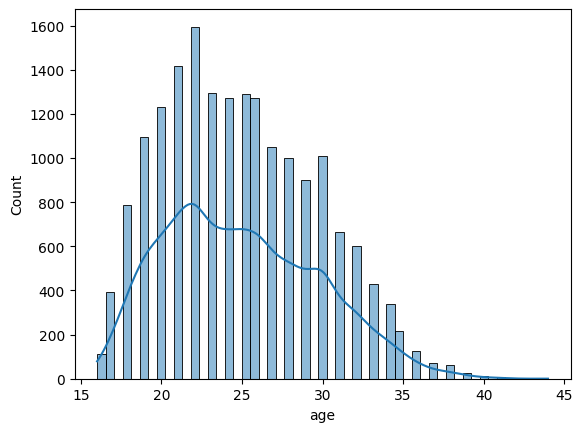

In [60]:
sns.histplot(data=df, x="age", kde=True)

Text(0.5, 0.98, 'Distribution of Age in Different Leagues')

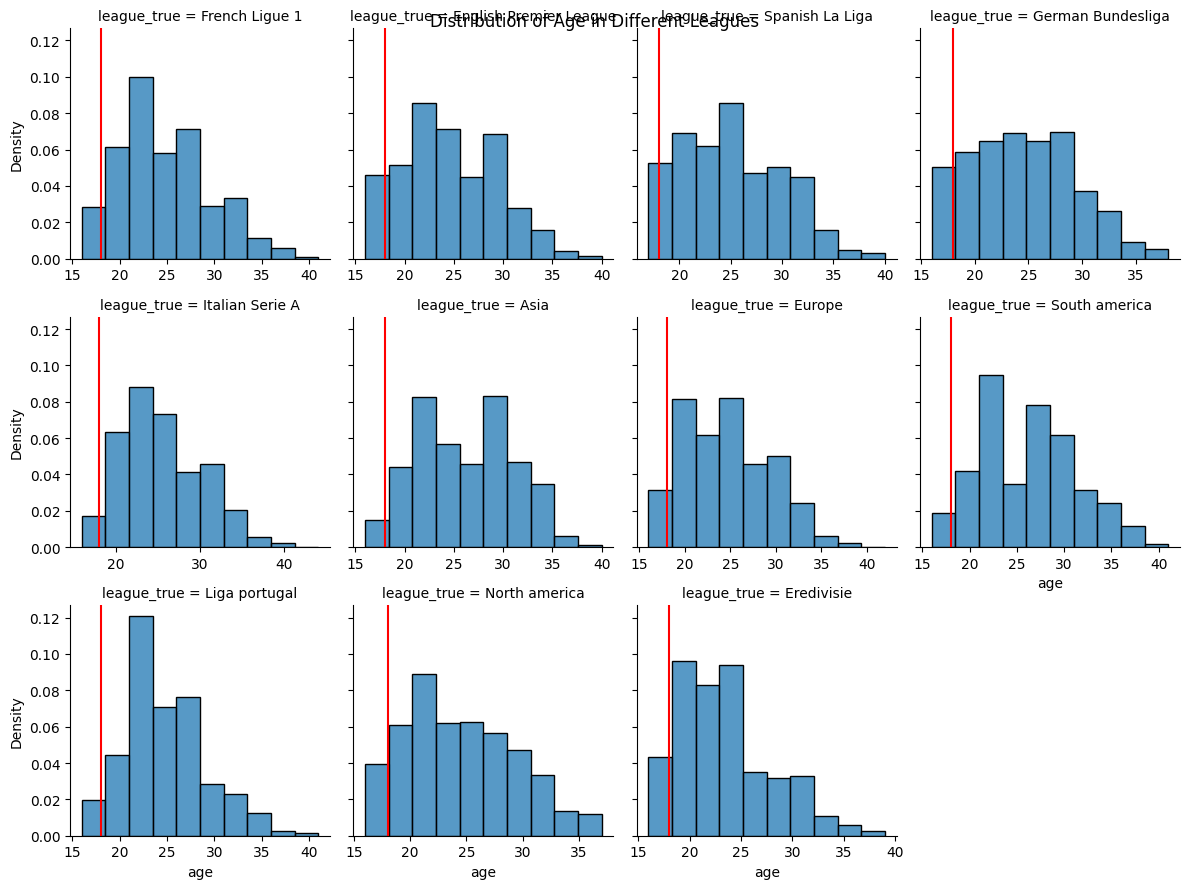

In [98]:
g = sns.FacetGrid(df, col='league_true', col_wrap=4, sharex=False)
g.map(sns.histplot, 'age', bins=10,stat="density", common_norm=False)
g.map(lambda x, **kwargs: plt.axvline(18, color='r'), 'age')
g.fig.suptitle("Distribution of Age in Different Leagues")

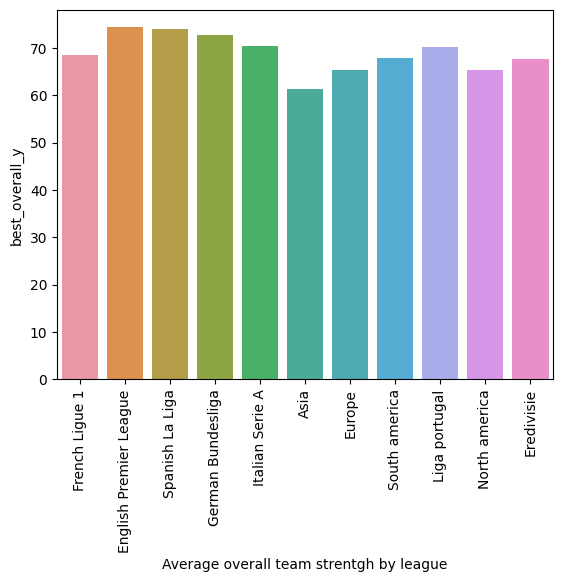

In [120]:
sns.barplot(x='league_true', y='best_overall_y', data=df, ci=None)
plt.xticks(rotation=90)
plt.xlabel("Average overall team strentgh by league")
plt.show()

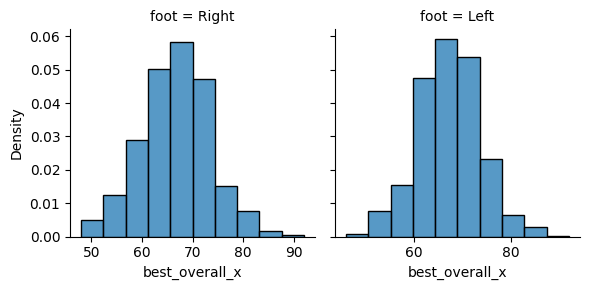

In [118]:
g = sns.FacetGrid(df, col='foot', col_wrap=2, sharex=False)
g.map(sns.histplot, 'best_overall_x', bins=10,stat="density", common_norm=False)

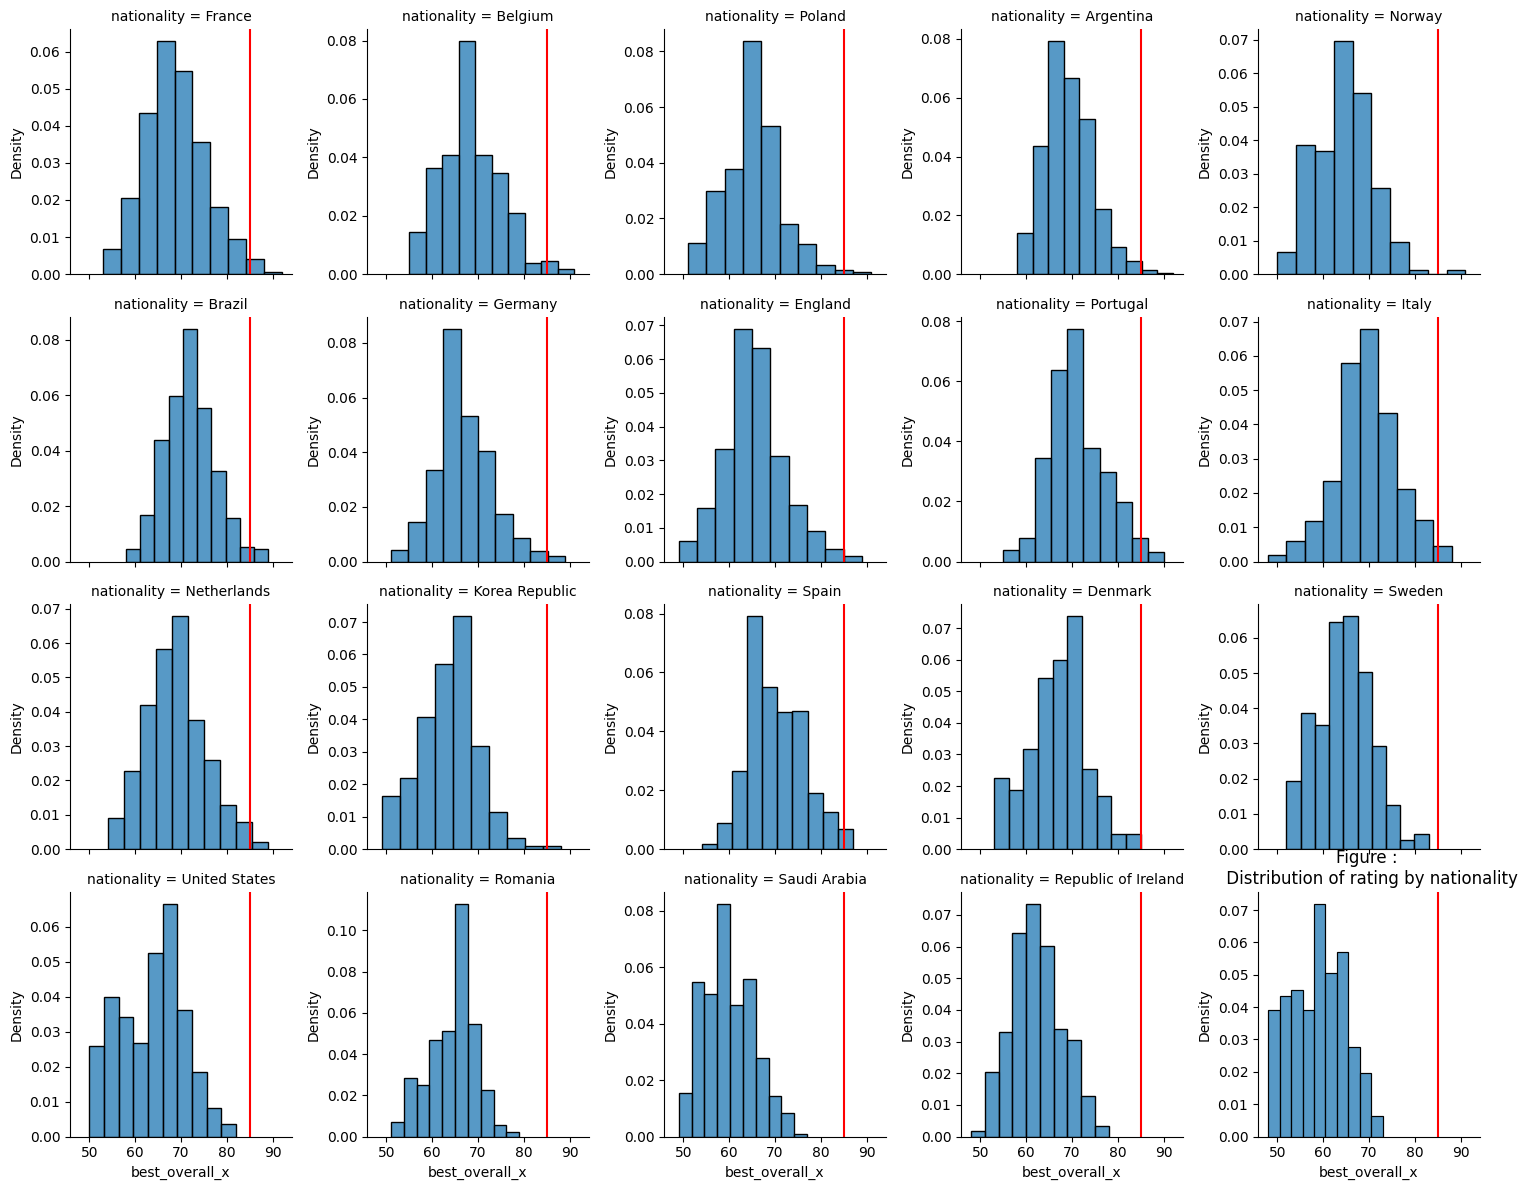

In [129]:
top_nationalities = df['nationality'].value_counts().head(20).index.tolist()
df_filtered = df[df['nationality'].isin(top_nationalities)]

g = sns.FacetGrid(df_filtered, col='nationality', col_wrap=5, sharey=False)
g.map(sns.histplot, 'best_overall_x', bins=10,stat="density", common_norm=False)
g.map(lambda x, **kwargs: plt.axvline(85, color='r'), 'best_overall_x')
plt.title("Figure : \n Distribution of rating by nationality");
plt.show()

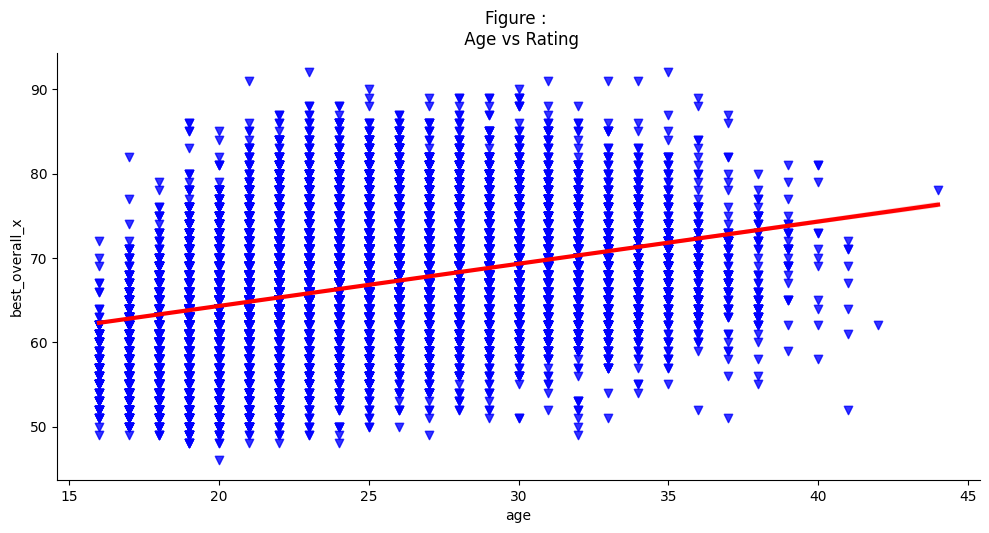

In [127]:
sns.lmplot(x="age", y="best_overall_x",data=df,markers="v",
            scatter_kws={"color": "blue"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n Age vs Rating");

<Axes: xlabel='best_overall_x', ylabel='BMI'>

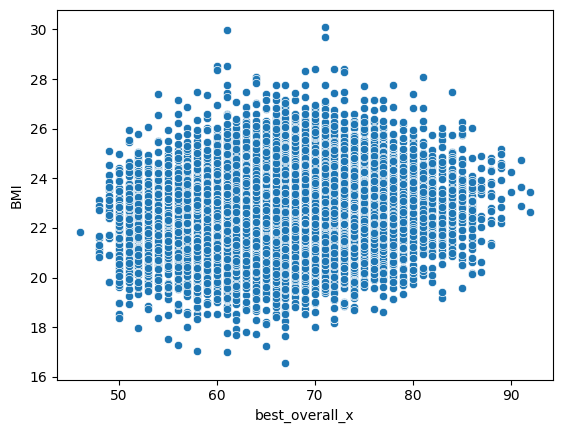

In [131]:
sns.scatterplot(data=df, x="best_overall_x", y="BMI")

In [1]:
countries = df['nationality'].values

countries = countries.tolist()

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a new column with the frequency of each country in the list
world['freq'] = world['name'].apply(lambda x: countries.count(x))

# Set the color map and the range of the colorbar
cmap = 'YlGnBu'
vmin, vmax = min(world['freq']), max(world['freq'])

# Create the map
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.set_title('Fréquence des nationalités')
ax.axis('off')
world.plot(column='freq', cmap=cmap, ax=ax, legend=True, vmin=vmin, vmax=vmax)
plt.show()

NameError: name 'df' is not defined

In [ ]:
df.to_csv('C:/Users/AymenBouhou/Desktop/Stage/scraper-main/src/2023.csv', index=False)

In [4]:
import os
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from ipywidgets import interact, widgets

In [5]:
prof = ProfileReport(df)
prof.to_file(output_file='rapport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile = ProfileReport(df, minimal=True)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df_sample = df[['short_name','nationality']].head(20)

In [10]:
df_sample

,short_name,nationality
0,K. Mbappé,France
1,K. De Bruyne,Belgium
2,R. Lewandowski,Poland
3,K. Benzema,France
4,L. Messi,Argentina
5,T. Courtois,Belgium
6,E. Haaland,Norway
7,Alisson,Brazil
8,J. Kimmich,Germany
9,M. Salah,Egypt


In [13]:
country = pd.read_csv('Data/Transformation/country_continent.csv')

In [16]:
country = country.rename(columns={'Country': 'nationality'})
country

,nationality,Continent
0,France,West Europe
1,Belgium,West Europe
2,Norway,West Europe
3,Germany,West Europe
4,England,West Europe
...,...,...
155,Seychelles,Others
156,Faroe Islands,Others
157,Kosovo,Others
158,Montenegro,Others


In [17]:
df_sample = pd.merge(df_sample, leagues, on='nationality', how='left')

In [18]:
df_sample

,short_name,nationality,Continent
0,K. Mbappé,France,West Europe
1,K. De Bruyne,Belgium,West Europe
2,R. Lewandowski,Poland,East Europe
3,K. Benzema,France,West Europe
4,L. Messi,Argentina,South America
5,T. Courtois,Belgium,West Europe
6,E. Haaland,Norway,West Europe
7,Alisson,Brazil,South America
8,J. Kimmich,Germany,West Europe
9,M. Salah,Egypt,Africa
